## Tarea 1: Machine Learning

### Alumno: Bastián Barraza Morales.
### Profesor: Alejandro Pereira.

En primer lugar, se importan las bibliotecas necesarias, como NumPy y Matplotlib:

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

Luego, definimos nuestros datos de entrenamiento. En este ejemplo, utilizaremos un conjunto de datos extraídos desde Kaggle, los cuales relacionan el índice de felicidad de personas agrupadas por país durante 2015-2020, en relación a un conjunto de variables. En este caso se utilizará este índice como la variable regresora, y el ingreso per capita como la variable explicatoria. Luego inicializamos los parámetros (theta) y establecemos algunos hiperparámetros, como la tasa de aprendizaje y el número de iteraciones para el descenso de gradiente.

In [53]:
url = 'https://raw.githubusercontent.com/bastianbm7/Machine-Learning-Course/main/Homework%201/WorldHappiness_Corruption_2015_2020.csv'
df = pd.read_csv(url)
Y = np.array(df['happiness_score'])
X = np.array(df['gdp_per_capita'])

# Define initial values of parameters
m = 0
b = 0

# Define hyperparameters
learning_rate = 0.01
epochs = 2000

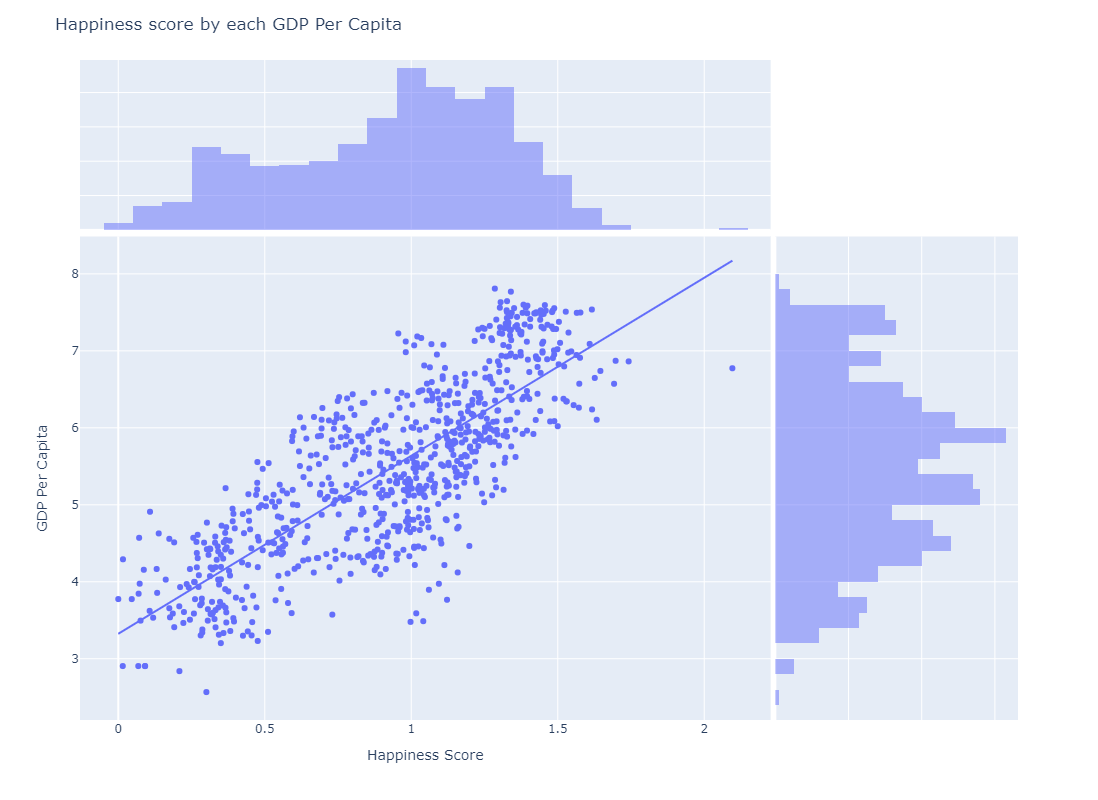

In [54]:
fig = px.scatter(x=X, y= Y, marginal_x="histogram", marginal_y="histogram", trendline="ols", width=800, height=800)
fig.update_layout(title='Happiness score by each GDP Per Capita')
fig.update_xaxes(title='Happiness Score',row=1, col=1)
fig.update_yaxes(title='GDP Per Capita',row=1, col=1)
fig.show()

A continuación, definimos una función de costo para calcular el error cuadrático medio (MSE) entre los valores predichos y los valores reales, y una función de descenso de gradiente para actualizar los parámetros utilizando los gradientes de la función de costo con respecto a cada parámetro.

In [55]:
# Define cost function
def compute_cost(Y, Y_pred):
    cost = np.sum((Y - Y_pred)**2) / (2 * len(Y))
    return cost

# Perform gradient descent
costs = []
for epoch in range(epochs):
    Y_pred = m * X + b
    cost = compute_cost(Y, Y_pred)
    dm = -(2/len(Y)) * np.sum(X * (Y - Y_pred))
    db = -(2/len(Y)) * np.sum(Y - Y_pred)
    m = m - learning_rate * dm
    b = b - learning_rate * db
    costs.append(cost)

In [56]:
# Define cost function
def compute_cost(Y, Y_pred):
    cost = np.sum((Y - Y_pred)**2) / (2 * len(Y))
    return cost

# Perform gradient descent
costs = []
for epoch in range(epochs):
    Y_pred = m * X + b
    cost = compute_cost(Y, Y_pred)
    dm = -(2/len(Y)) * np.sum(X * (Y - Y_pred))
    db = -(2/len(Y)) * np.sum(Y - Y_pred)
    m = m - learning_rate * dm
    b = b - learning_rate * db
    costs.append(cost)

Después de ejecutar el descenso de gradiente, trazamos la historia del costo para verificar si el algoritmo ha convergido.

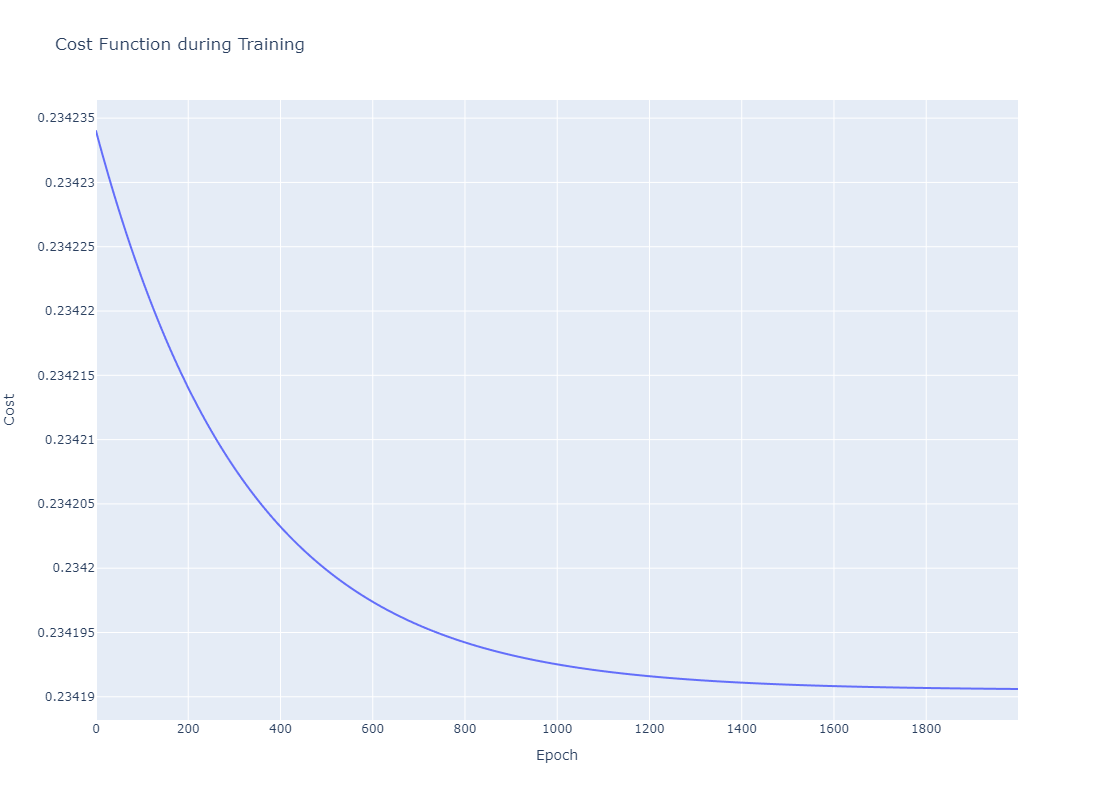

In [57]:
# Visualization of cost function during training
fig = px.line(x=list(range(epochs)), y=costs, title='Cost Function during Training', width=800, height=800)
fig.update_layout(xaxis_title='Epoch', yaxis_title='Cost')
fig.show()

Se observa que el algoritmo converge cercano a la iteración 1200 cuando el learning rate es de 0.01, llegando en ese punto a una pérdida de 0.2341